In [9]:
import os
import zipfile
local_zip = '/tmp/cats_and_dogs_filtered.zip'

zip_ref = zipfile.ZipFile(local_zip, 'r')

zip_ref.extractall('/tmp')
zip_ref.close()


경로 지정하기

In [17]:
base_dir = '../tmp/cats_and_dogs_filtered'

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')
print(train_cats_dir)
print(train_dogs_dir)

validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
print(validation_cats_dir)
print(validation_dogs_dir)

../tmp/cats_and_dogs_filtered/train/cats
../tmp/cats_and_dogs_filtered/train/dogs
../tmp/cats_and_dogs_filtered/validation/cats
../tmp/cats_and_dogs_filtered/validation/dogs


In [19]:
train_cat_fnames = os.listdir(train_cats_dir)
train_dog_fnames = os.listdir(train_dogs_dir)

print(train_cat_fnames[:5])
print(train_dog_fnames[:5])

['cat.787.jpg', 'cat.324.jpg', 'cat.756.jpg', 'cat.95.jpg', 'cat.680.jpg']
['dog.885.jpg', 'dog.224.jpg', 'dog.909.jpg', 'dog.71.jpg', 'dog.975.jpg']


In [20]:
print('Total training cat images :', len(os.listdir(train_cats_dir)))
print('Total training dog images :', len(os.listdir(train_dogs_dir)))

print('Total validation cat images :', len(os.listdir(validation_cats_dir)))
print('Total validation dog images :', len(os.listdir(validation_dogs_dir)))

Total training cat images : 1000
Total training dog images : 1000
Total validation cat images : 500
Total validation dog images : 500


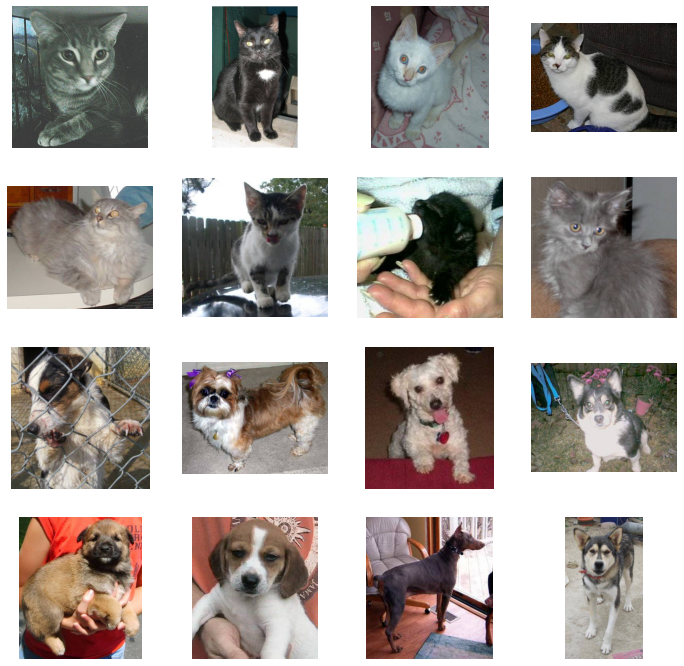

In [21]:
%matplotlib inline

import matplotlib.image as mpimg
import matplotlib.pyplot as plt

nrows, ncols = 4, 4
pic_index = 0

fig = plt.gcf()
fig.set_size_inches(ncols*3, nrows*3)

pic_index+=8

next_cat_pix = [os.path.join(train_cats_dir, fname)
                for fname in train_cat_fnames[ pic_index-8:pic_index]]

next_dog_pix = [os.path.join(train_dogs_dir, fname)
                for fname in train_dog_fnames[ pic_index-8:pic_index]]

for i, img_path in enumerate(next_cat_pix+next_dog_pix):
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off')

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

In [22]:
import tensorflow as tf

model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(16, (3, 3), activation='relu', input_shape=(150, 150, 3)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation='relu'),
  tf.keras.layers.Dense(1, activation='sigmoid')
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 64)       0

모델 컴파일

In [24]:
from tensorflow.keras.optimizers import RMSprop

model.compile(optimizer=RMSprop(learning_rate=0.001), # Root Mean Square Propagation Algorithm
              loss='binary_crossentropy',
              metrics=['accuracy'])

이미지 데이터 전처리

In [25]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1.0/255)
test_datagen = ImageDataGenerator(rescale=1.0/255)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size=20,
                                                    class_mode='binary',
                                                    target_size=(150, 150))
validation_generator = test_datagen.flow_from_directory(validation_dir,
                                                        batch_size=20,
                                                        class_mode='binary',
                                                        target_size=(150, 150))

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


모델 학습

In [28]:
history = model.fit(train_generator,
                    validation_data=validation_generator,
                    steps_per_epoch=10,
                    epochs=20,
                    validation_steps=10,
                    verbose=2
                    )

Epoch 1/20
10/10 - 12s - loss: 0.0010 - accuracy: 1.0000 - val_loss: 2.4462 - val_accuracy: 0.7110 - 12s/epoch - 1s/step
Epoch 2/20
10/10 - 12s - loss: 4.5655e-04 - accuracy: 1.0000 - val_loss: 2.7405 - val_accuracy: 0.7220 - 12s/epoch - 1s/step
Epoch 3/20
10/10 - 12s - loss: 0.0813 - accuracy: 0.9850 - val_loss: 4.4615 - val_accuracy: 0.6200 - 12s/epoch - 1s/step
Epoch 4/20
10/10 - 12s - loss: 0.1585 - accuracy: 0.9500 - val_loss: 2.5353 - val_accuracy: 0.7040 - 12s/epoch - 1s/step
Epoch 5/20
10/10 - 12s - loss: 0.0041 - accuracy: 0.9950 - val_loss: 2.5861 - val_accuracy: 0.7000 - 12s/epoch - 1s/step
Epoch 6/20
10/10 - 12s - loss: 5.2110e-05 - accuracy: 1.0000 - val_loss: 2.6042 - val_accuracy: 0.6970 - 12s/epoch - 1s/step
Epoch 7/20
10/10 - 12s - loss: 0.0270 - accuracy: 0.9900 - val_loss: 2.7566 - val_accuracy: 0.7010 - 12s/epoch - 1s/step
Epoch 8/20
10/10 - 12s - loss: 0.0078 - accuracy: 0.9950 - val_loss: 2.6739 - val_accuracy: 0.6990 - 12s/epoch - 1s/step
Epoch 9/20
10/10 - 12s -

학습량이 적어서 유의미한 수치는 나오지 않음

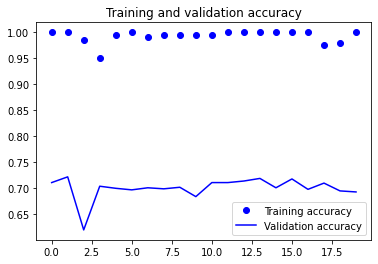

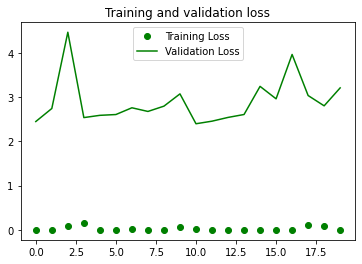

In [30]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'go', label='Training Loss')
plt.plot(epochs, val_loss, 'g', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

Saving test_dog.png to test_dog (5).png


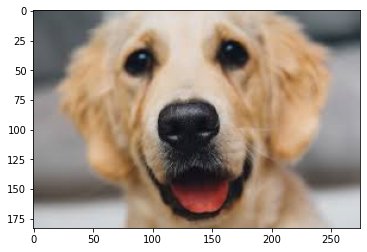

[1.]
test_dog.png is a dog


In [36]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
  path='/content/'+fn
  img = image.load_img(path, target_size=(150, 150))

  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  iamges = np.vstack([x])

  classes = model.predict(iamges, batch_size=10)

  pltimage = mpimg.imread(path)
  plt.imshow(pltimage)
  plt.show()

  print(classes[0])

  if classes[0]>0:
    print(fn + " is a dog")
  else:
    print(fn + " is a cat")